# Time Series Linear Regressions

Finding linear trends in Time Series is a common task to perform.

The Time Series Toolbox allow to compute Ordinary Least Square (classic linear regression) on time series.

## Introduction


### Imports

We import required packages:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from odapi.connectors import Irceline

In [2]:
from odapi.settings import settings
settings.logger.setLevel(40)

### Dataset & Client

We load the dataset we previously stored and create the Irceline client:

In [3]:
data = pd.read_pickle("dump/brussels_2014.pickle")
client = Irceline()

## Linear Regressions

It is sufficient to apply the `reglin` method to the DataFrame:

In [4]:
ols = data.apply(client.reglin)

Then we can adapt units to make it more readable:

In [5]:
ols.loc[pd.IndexSlice['slope']] = ols.loc[pd.IndexSlice['slope']]*60*60*24*365.25

A sample of the result is shown below:

In [6]:
ols.filter(regex='NO.*/41R0(02|12)')

seriekey   NO/41R002 (µg/m³) NO/41R012 (µg/m³) NO2/41R002 (µg/m³)  \
sitekey               41R002            41R012             41R002   
measurekey                NO                NO                NO2   
serieid                 6614              6621               6615   
slope           9.710724e+00      5.065185e+00      -4.532157e+00   
intercept       2.848674e+01      3.280560e+00       4.974277e+01   
r_value         8.124059e-02      1.297905e-01      -5.673877e-02   
p_value         1.190205e-13      9.947532e-32       2.263589e-07   
std_err         4.141294e-08      1.363533e-08       2.772173e-08   

seriekey   NO2/41R012 (µg/m³)  
sitekey                41R012  
measurekey                NO2  
serieid                  6622  
slope            5.334186e+00  
intercept        1.882695e+01  
r_value          9.617938e-02  
p_value          3.802062e-18  
std_err          1.941749e-08

## Linear Trends

**Disclaimer:** The existence of yearly cyles on time series make this analysis irrelevant as the slope is dominated by the window location of our time sampling. To make more relevant, we should sample more cycles to average out this effect, let's say a window of 10 years. Anyway, this example stands for feasability not relevancy.

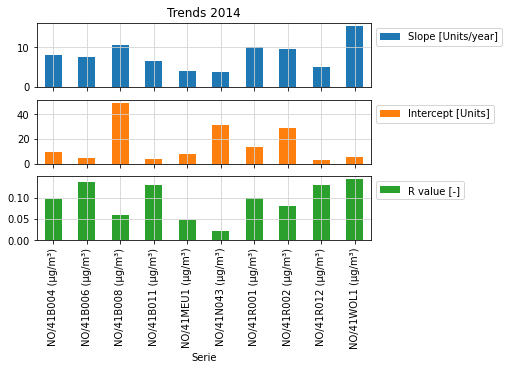

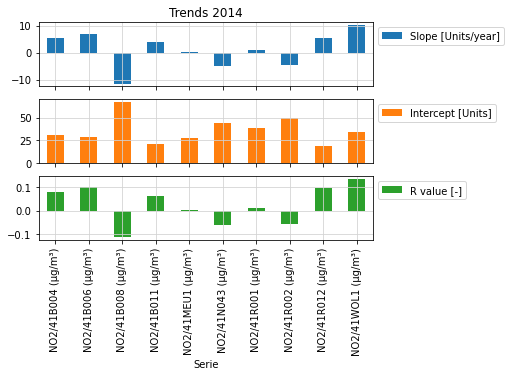

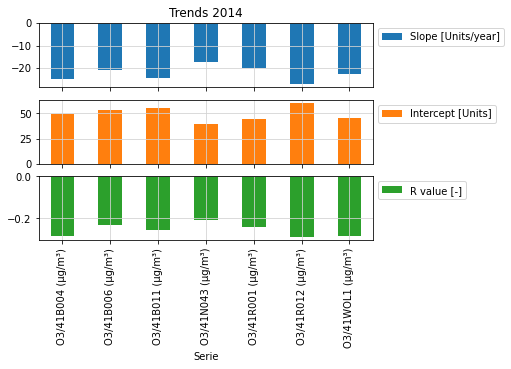

In [7]:
scales = client.scales()
legends = ['Slope [Units/year]', 'Intercept [Units]', 'R value [-]']
for k in ['NO', 'NO2', 'O3']:#ols.columns.levels[2]:
    axes = ols.filter(regex='{}/'.format(k)).droplevel([1,2,3], axis=1).T[['slope', 'intercept', 'r_value']]\
              .plot(kind='bar', sharex=True, subplots=True)
    for i, axe in enumerate(axes):
        axe.set_title("")
        axe.legend([legends[i]], bbox_to_anchor=(1, 1), loc='upper left')
        axe.grid(which='both', color='lightgray')
    axes[0].set_title("Trends 2014")
    axes[-1].set_xlabel("Serie")